In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from main import main
from main_multi import main_multi
from main_multi_transfer import main_multi_transfer
from evolution.chromosome import *
from utils.data_manipulators import *
from problems.knapsack_generator import knapsack_generator
%matplotlib notebook

In [2]:
def get_fitness(results):
    fitnesses = np.zeros_like(results)
    for i, rep in enumerate(results):
        for j, gen in enumerate(rep):
            if gen.any() is not None:
                fitnesses[i, j, :] = Chromosome.fitness_to_numpy(gen)
    return fitnesses

def time_concat(time_hist):
    for i in range(1, len(time_hist)):
        time_hist[i] += time_hist[i-1]
    return time_hist

# Test V5 added

In [3]:
class args:
#     tsamples = 10
    src_version = 'v3'
    stop_condition = False
    reps = 30
    transfer = True
    delta = 2
    buildmodel = False
    s1_psize = 50
    s2_psize = 1
    sample_size = 50
    sub_sample_size = 1000
    version = 'v2'
    mutation_strength = 1
    injection_type = 'full'
    to_repititon_num = 10
    selection_version = 'v1'
    c = np.sqrt(1.5)
    efficient_version = True
    transfer_repeat_num = 1
    save_path = 'new_data/results_paral_transfer_src_v3'

In [ ]:
now = time()
results_paral_transfer_src_v3 = main_multi_transfer(args)
end = time()
print("duration: ", str((end - now)/60))
# Tools.save_to_file('new_data/results_efficient_src_v3', results_efficient_src_v3)

In [4]:
# now = time()
# results_efficient_src_v3 = main_multi(args)
# end = time()  
# print("duration: ", str((end - now)/60))
# # Tools.save_to_file('new_data/results_efficient_src_v3', results_efficient_src_v3)

In [5]:
# args.version = 'to'
# now = time()
# results_to = main(args)
# end = time()  
# print("duration: ", str((end - now)/60))
# Tools.save_to_file('new_data/results_to', results_to)

In [6]:
# args.version = 'ea_time_scale'
# now = time()
# results_ea = main(args)
# end = time()  
# print("duration: ", str((end - now)/60))
# Tools.save_to_file('new_data/results_ea', results_ea)

# Loading Files

In [7]:
# results_v2_selv1_tor10 = Tools.load_from_file('new_data/results_v2_selv1_tor10')
# results_v2_selv1_tor10_efficient = Tools.load_from_file('new_data/results_v2_selv1_tor10_efficient')
results_ea = Tools.load_from_file('new_data/results_ea')
results_to = Tools.load_from_file('new_data/results_to')
results_efficient_src_v3 = Tools.load_from_file('new_data/results_efficient_src_v3')
results_paral_transfer_src_v3 = Tools.load_from_file('new_data/results_paral_transfer_src_v3')
# results_v2_selv1_tor10_rep = []
# results_v2_selv1_tor10_efficient_rep = []
# test_cases = [1, 5, 10, 15, 20, 25, 30, 35, 40]
# for test in test_cases:
#     if test<15:
#         results_v2_selv1_tor10_rep.append(Tools.load_from_file('new_data/results_v2_selv1_tor10_rep' + str(test)))
#     results_v2_selv1_tor10_efficient_rep.append(Tools.load_from_file('new_data/results_v2_selv1_tor10_efficient_rep' + str(test)))

In [8]:
# fitness_v2_selv1_tor10 = get_fitness(results_v2_selv1_tor10[0]).mean(axis=0).mean(axis=1)
# fitness_v2_selv1_tor10_efficient = get_fitness(results_v2_selv1_tor10_efficient[0]).mean(axis=0).mean(axis=1)
fitness_ea = results_ea[0].mean(axis=0).mean(axis=1)
fitness_to = results_to[0].mean(axis=0).mean(axis=1)
fitness_efficient_src_v3 = np.array([result[1] for result in results_efficient_src_v3]).mean(axis=0).mean(axis=1)
fitness_paral_transfer_src_v3 = np.array([result[1] for result in results_paral_transfer_src_v3]).mean(axis=0).mean(axis=1)

# fitness_v2_selv1_tor10_rep = []
# fitness_v2_selv1_tor10_efficient_rep = []
# test_cases = [1, 5, 10, 15, 20, 25, 30, 35, 40]
# for i, test in enumerate(test_cases):
#     if test<15:
#         fitness_v2_selv1_tor10_rep.append(get_fitness(results_v2_selv1_tor10_rep[i][0]).mean(axis=0).mean(axis=1))
#     fitness_v2_selv1_tor10_efficient_rep.append(get_fitness(results_v2_selv1_tor10_efficient_rep[i][0]).mean(axis=0).mean(axis=1))

In [ ]:
# time_v2_selv1_tor10 = time_concat(results_v2_selv1_tor10[3].mean(axis=0).mean(axis=1))
# time_v2_selv1_tor10_efficient = time_concat(results_v2_selv1_tor10_efficient[3].mean(axis=0).mean(axis=1))
time_ea = time_concat(results_ea[1].mean(axis=0))
time_to = time_concat(results_to[2].mean(axis=0))
time_efficient_src_v3 = time_concat(np.array([result[0] for result in results_efficient_src_v3]).mean(axis=0))
time_paral_transfer_src_v3 = time_concat(np.array([result[0] for result in results_paral_transfer_src_v3]).mean(axis=0))

# time_v2_selv1_tor10_rep = []
# time_v2_selv1_tor10_efficient_rep = []
# test_cases = [1, 5, 10, 15, 20, 25, 30, 35, 40]
# for i, test in enumerate(test_cases):
#     if test<15:
#         time_v2_selv1_tor10_rep.append(time_concat(results_v2_selv1_tor10_rep[i][3].mean(axis=0).mean(axis=1)))
#     time_v2_selv1_tor10_efficient_rep.append(time_concat(results_v2_selv1_tor10_efficient_rep[i][3].mean(axis=0).mean(axis=1)))

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


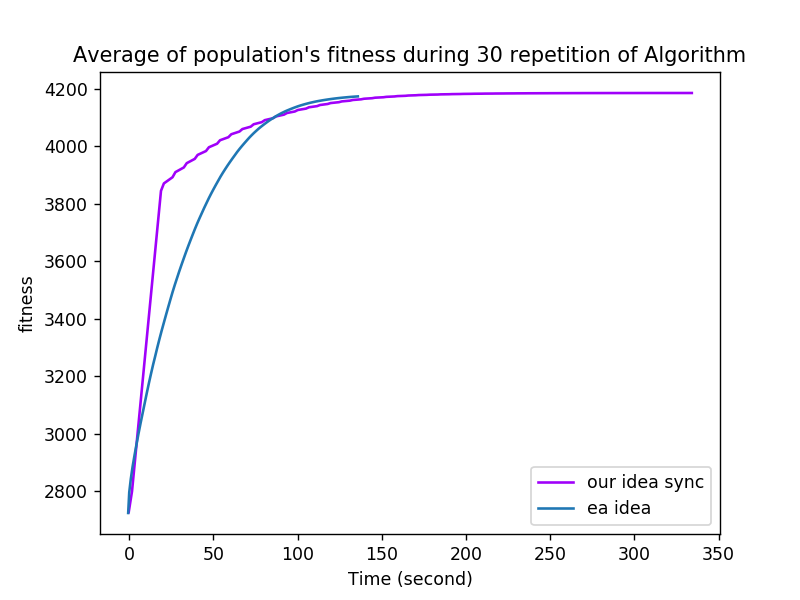

In [18]:
# plt.plot(time_v2_selv1_tor10_efficient, fitness_v2_selv1_tor10_efficient, '#aa0a0a', label='our idea efficient 10 pop_s2')
# plt.plot(time_v2_selv1_tor10, fitness_v2_selv1_tor10, '#bcabcc', label='our idea not efficient 10 pop_s2')
plt.figure()

plt.plot(time_efficient_src_v3, fitness_efficient_src_v3, '#a000fa', label='our idea sync')
plt.plot(time_paral_transfer_src_v3, fitness_paral_transfer_src_v3, '#02a01a', label='transfer sync')
plt.plot(time_to, fitness_to,label='transfer idea (delta=2)')
plt.plot(time_ea, fitness_ea,label='ea idea')
# for i, test in enumerate(test_cases):
#     if test==10:
#         plt.plot(time_v2_selv1_tor10_efficient_rep[i][:-1], fitness_v2_selv1_tor10_efficient_rep[i][:-1], 
#                  c=np.random.rand(3,), label='our idea efficient 10 pop_s2 rep ' + str(test))
#     if test==10:
#         plt.plot(time_v2_selv1_tor10_rep[i][:-1], fitness_v2_selv1_tor10_rep[i][:-1], 
#              c=np.random.rand(3,), label='our idea not efficient 10 pop_s2 rep ' + str(test))

plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('fitness')
plt.title("Average of population's fitness during 30 repetition of Algorithm")
plt.show()

<IPython.core.display.Javascript object>


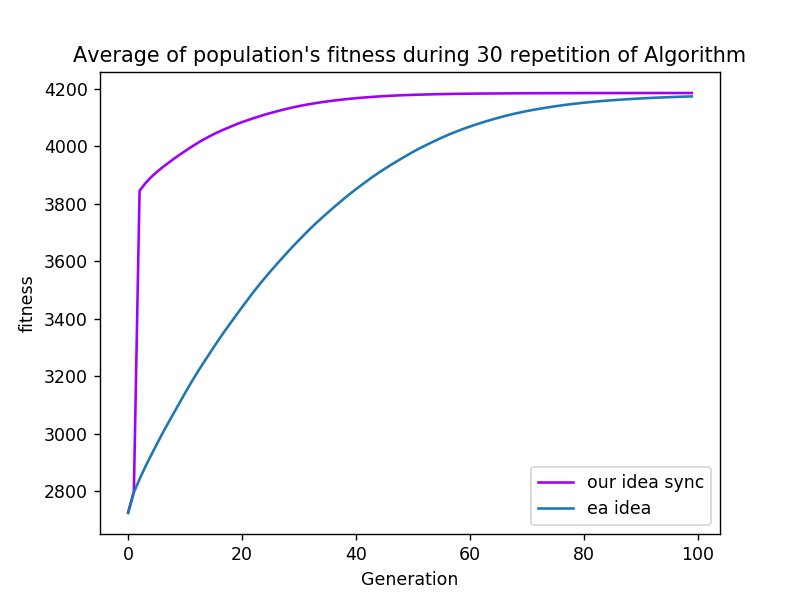

In [17]:
# plt.plot(time_v2_selv1_tor10_efficient, fitness_v2_selv1_tor10_efficient, '#aa0a0a', label='our idea efficient 10 pop_s2')
# plt.plot(time_v2_selv1_tor10, fitness_v2_selv1_tor10, '#bcabcc', label='our idea not efficient 10 pop_s2')
plt.figure()
plt.plot(range(100), fitness_efficient_src_v3, '#a000fa', label='our idea sync')
plt.plot(range(100), fitness_paral_transfer_src_v3, '#02a01a', label='transfer sync')

plt.plot(range(100), fitness_to,label='transfer idea (delta=2)')
plt.plot(range(100), fitness_ea,label='ea idea')
# for i, test in enumerate(test_cases):
#     if test==10:
#         plt.plot(time_v2_selv1_tor10_efficient_rep[i][:-1], fitness_v2_selv1_tor10_efficient_rep[i][:-1], 
#                  c=np.random.rand(3,), label='our idea efficient 10 pop_s2 rep ' + str(test))
#     if test==10:
#         plt.plot(time_v2_selv1_tor10_rep[i][:-1], fitness_v2_selv1_tor10_rep[i][:-1], 
#              c=np.random.rand(3,), label='our idea not efficient 10 pop_s2 rep ' + str(test))

plt.legend()
plt.xlabel('Generation')
plt.ylabel('fitness')
plt.title("Average of population's fitness during 30 repetition of Algorithm")
plt.show()